In [1]:
import numpy as np
import pandas as pd
from glob import glob
from os.path import join, dirname
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("whitegrid")

In [3]:
root_dir = './'
behav_dir = root_dir + '/DMdata'

In [4]:
# subj_dir = glob(join(behav_dir,'DM*'))
# subj_dir.sort()
subj_list = ['DM01','DM02','DM03','DM04','DM05','DM06','DM07','DM08','DM10','DM11',
         'DM12','DM14','DM15','DM16','DM17','DM18','DM19','DM22','DM23','DM25',
         'DM26','DM29','DM30']
subj_dir = [join(behav_dir,subj) for subj in subj_list]
len(subj_dir)

23

### Task : 
#### old = 0, new = 1
### Response 1 : 
#### Old_Certain = 1, Old_Uncertain = 2, New_Uncertain = 3, New_Certain = 4
### Response 2 : 
#### Location, new = 0, forgot = 5

# Load data

In [5]:
ds = pd.DataFrame(columns=['Trial','ObjID','LocID','FB','Task','RT','Stim'])
for sd in subj_dir:
    subj = sd[-4:]
    temp = pd.read_csv(sd+'/%s_study.txt'%subj, sep='\t', index_col=False)
    temp['Subj'] = subj
    ds = ds.append(temp)
# ds = ds.set_index(keys='Subj')
ds = ds[['ObjID','LocID','Subj']]
ds

,ObjID,LocID,Subj
0,245,4,DM01
1,183,2,DM01
2,54,1,DM01
3,220,3,DM01
4,65,2,DM01
...,...,...,...
259,160,4,DM30
260,189,2,DM30
261,127,1,DM30
262,112,3,DM30


In [6]:
dt = pd.DataFrame(columns=['Trial','Object_ID','Task_Type','Stim_onset1','RT1','Res1','Stim_onset2','RT2','Res2'])
for sd in subj_dir:
    subj = sd[-4:]
    temp = pd.read_csv(sd+'/%s_test.txt'%subj, sep='\s+', header=0)
    temp['Subj'] = subj
    dt = dt.append(temp)
# dt = dt.set_index(keys='Subj')
dt = dt[['Trial','Object_ID','Task_Type','Res1','Res2','Subj']]
dt = dt.rename(columns={'Object_ID':'ObjID','Task_Type':'TT'})
dt

,Trial,ObjID,TT,Res1,Res2,Subj
0,1,72,1,2,0,DM01
1,2,122,1,4,0,DM01
2,3,114,1,3,0,DM01
3,4,108,0,1,3,DM01
4,5,145,0,1,3,DM01
...,...,...,...,...,...,...
523,524,249,1,3,0,DM30
524,525,51,0,1,3,DM30
525,526,260,0,1,5,DM30
526,527,92,0,1,1,DM30


# merge DataFrame

In [7]:
# dt = dt[~dt['TT'].isin([1])]
df = pd.merge(ds,dt)
df

,ObjID,LocID,Subj,Trial,TT,Res1,Res2
0,245,4,DM01,116,0,1,4
1,245,4,DM01,362,1,2,0
2,183,2,DM01,61,0,3,5
3,183,2,DM01,157,1,3,0
4,54,1,DM01,95,0,1,1
...,...,...,...,...,...,...,...
12139,127,1,DM30,330,0,2,5
12140,112,3,DM30,2,1,3,0
12141,112,3,DM30,288,0,3,5
12142,20,4,DM30,194,0,1,5


In [8]:
choice = ['HIT-HC','HIT-LC','MISS-LC','MISS-HC','FA-HC','FA-LC','CR-LC','CR-HC']
# df[df.TT==0].Res1 = df[df.TT==0].Res1.replace({1:choice[0],2:choice[1],3:choice[2],4:choice[3]})
df['Res1'] = [choice[tt*4 + res1 - 1] for tt, res1 in zip(df['TT'],df['Res1'])]
df

,ObjID,LocID,Subj,Trial,TT,Res1,Res2
0,245,4,DM01,116,0,HIT-HC,4
1,245,4,DM01,362,1,FA-LC,0
2,183,2,DM01,61,0,MISS-LC,5
3,183,2,DM01,157,1,CR-LC,0
4,54,1,DM01,95,0,HIT-HC,1
...,...,...,...,...,...,...,...
12139,127,1,DM30,330,0,HIT-LC,5
12140,112,3,DM30,2,1,CR-LC,0
12141,112,3,DM30,288,0,MISS-LC,5
12142,20,4,DM30,194,0,HIT-HC,5


# Figure 2.B

In [9]:
## count elements whose value isn't NaN in each column
dg = df.groupby(['Subj','Res1']).count()

## remain ceratin column out of the dataframe and remove the index name
dg = dg['ObjID']

## row index 'Res1' be column index
dg = dg.unstack()

## There are no NaNs
dg[dg.isna()] = 0

## normalize to 1
for sd in subj_dir:
    subj = sd[-4:]
    dg.loc[subj] = dg.loc[subj]/(dg.loc[subj].sum()*.5)  # to divide by each number of trials 'New' and 'Old' separately
    
## remove the column name
dg.columns.name = None

## arrange the column index
dg = dg[choice]

dg

,HIT-HC,HIT-LC,MISS-LC,MISS-HC,FA-HC,FA-LC,CR-LC,CR-HC
Subj,,,,,,,,
DM01,0.670455,0.140152,0.106061,0.083333,0.030303,0.094697,0.344697,0.530303
DM02,0.431818,0.291667,0.143939,0.132576,0.071970,0.287879,0.314394,0.325758
DM03,0.609848,0.140152,0.140152,0.109848,0.022727,0.079545,0.306818,0.590909
DM04,0.696970,0.007576,0.018939,0.276515,0.132576,0.015152,0.037879,0.814394
DM05,0.469697,0.215909,0.068182,0.246212,0.056818,0.189394,0.106061,0.647727
DM06,0.416667,0.159091,0.075758,0.348485,0.064394,0.090909,0.090909,0.753788
DM07,0.299242,0.280303,0.181818,0.238636,0.034091,0.155303,0.321970,0.488636
DM08,0.405303,0.261364,0.242424,0.090909,0.018939,0.102273,0.594697,0.284091
DM10,0.693182,0.071970,0.102273,0.132576,0.018939,0.056818,0.250000,0.674242


In [10]:
# dg.columns = pd.MultiIndex.from_tuples(
#     [
#         ('New','HIT-HC'),('New','HIT-LC'),('New','MISS-LC'),('New','MISS-HC'),
#         ('Old','FA-HC'),('Old','FA-LC'),('Old','CR-LC'),('Old','CR-HC')
#     ], names=['style','choice']
# )
# dg

Text(0, 0.5, 'Response rate')

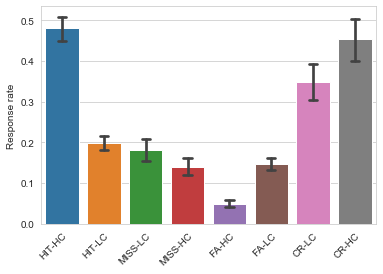

In [11]:
# plt.bar(x=dg.columns, height=dg.mean(), yerr=dg.sem())
ax = sns.barplot(data=dg, capsize=.2, ci=68)  # Show the standard error of the mean with the error bars(ci=68)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha="right",rotation_mode='anchor')
ax.set_ylabel('Response rate')

# Figure 2.C

In [12]:
temp = df[~df.Res2.isin([0,5])]
temp['SRC'] = np.where(temp['LocID']==temp['Res2'],'right','wrong')
# temp.TT.unique()
temp

D:\Program Files (x86)\anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ObjID,LocID,Subj,Trial,TT,Res1,Res2,SRC
0,245,4,DM01,116,0,HIT-HC,4,right
4,54,1,DM01,95,0,HIT-HC,1,right
7,220,3,DM01,515,0,MISS-LC,3,right
8,65,2,DM01,73,0,HIT-HC,2,right
10,255,3,DM01,99,0,HIT-HC,3,right
...,...,...,...,...,...,...,...,...
12067,94,3,DM30,465,0,HIT-LC,1,wrong
12071,41,1,DM30,335,0,HIT-HC,1,right
12117,66,1,DM30,414,0,HIT-HC,1,right
12118,38,4,DM30,38,0,HIT-HC,4,right


In [13]:
dh = temp[['Subj','Res1','SRC','TT']]

## count #of right and #of wrong per subj
dh = dh.groupby(['Subj','Res1','SRC']).count()
dh = dh['TT']

## row index 'SRC' be column index
dh = dh.unstack()

## there are no NaNs
dh[dh.isna()] = 0

## remove the column name
dh.columns.name = None

## calculate rate
dh['rate'] = dh['right']/(dh['wrong']+dh['right'])
dh = dh['rate']

## row index 'Res1' be column index
dh = dh.unstack()

## remove the column name
dh.columns.name = None

## rename the column indices
old_col = ['HIT-HC','HIT-LC','MISS-LC','MISS-HC']
new_col = ['HIT-HC & SRC','HIT-LC & SRC','MISS-LC & SRC','MISS-HC & SRC']
dh = dh.rename(columns={old:new for old, new in zip(old_col,new_col)})

dh = dh[new_col]

Text(0, 0.5, 'Source memory correct rate')

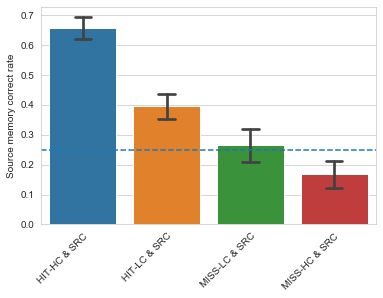

In [14]:
ax = sns.barplot(data=dh, capsize=.2, ci=68)  # Show the standard error of the mean with the error bars(ci=68)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha="right",rotation_mode='anchor')
ax.axhline(0.25, ls='--')
ax.set_ylabel('Source memory correct rate')

# Make the list of trial-by-trial ObjID per subj